In [7]:
import os
import sys
import glob
import json
import requests
import pandas as pd
from pathlib import Path
from tqdm.auto import tqdm
from PIL import Image, ImageSequence
tqdm.pandas()

In [8]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = os.path.abspath(os.path.join(os.getcwd(), 'pix-tagger-0163112445c2.json'))

In [9]:
def detect_labels(path):
    """Detects labels in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.label_detection(image=image)
    labels = response.label_annotations
    
#     return labels
    print('Labels:')

    for label in labels:
#         print(label)
        print(label.description)

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

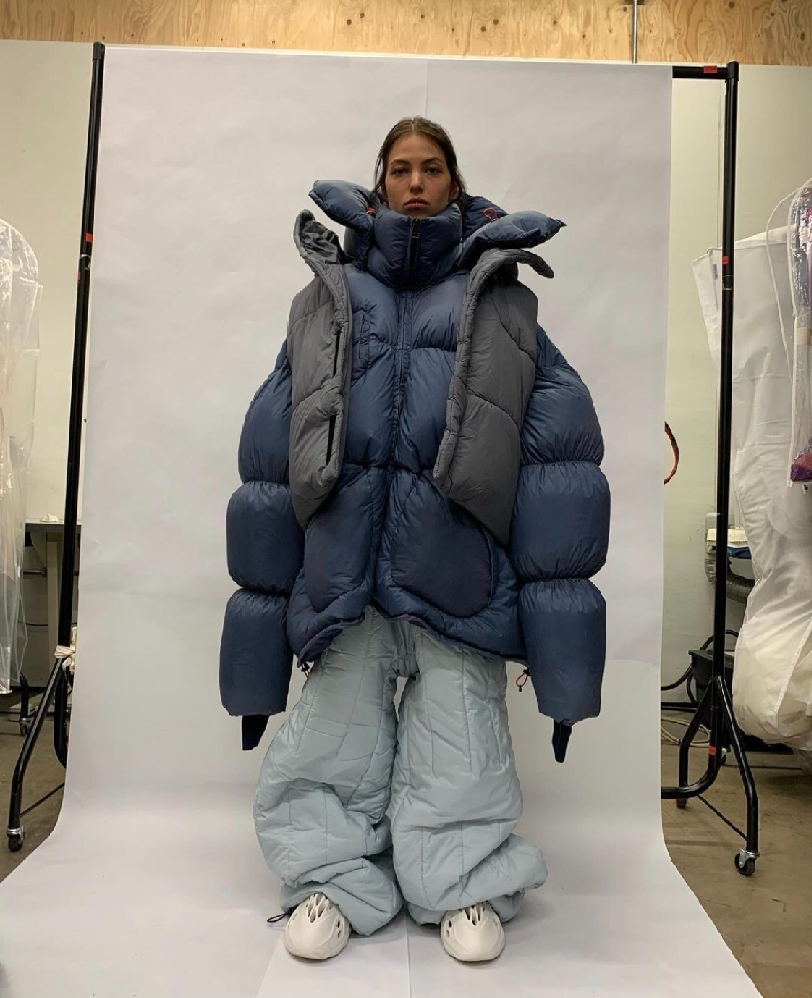

In [19]:
path = '아무리추워도.png'
Image.open(path)

In [20]:
detect_labels(path)

Labels:
Jacket
Winter
Textile
Outerwear
Coat
Parka
Fur
Street fashion
Hood
Fur clothing


In [21]:
def detect_web(path):
    """Detects web annotations given an image."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.web_detection(image=image)
    annotations = response.web_detection

    if annotations.best_guess_labels:
        for label in annotations.best_guess_labels:
            print('\nBest guess label: {}'.format(label.label))

#     if annotations.pages_with_matching_images:
#         print('\n{} Pages with matching images found:'.format(
#             len(annotations.pages_with_matching_images)))

#         for page in annotations.pages_with_matching_images:
#             print('\n\tPage url   : {}'.format(page.url))

#             if page.full_matching_images:
#                 print('\t{} Full Matches found: '.format(
#                        len(page.full_matching_images)))

#                 for image in page.full_matching_images:
#                     print('\t\tImage url  : {}'.format(image.url))

#             if page.partial_matching_images:
#                 print('\t{} Partial Matches found: '.format(
#                        len(page.partial_matching_images)))

#                 for image in page.partial_matching_images:
#                     print('\t\tImage url  : {}'.format(image.url))

#     if annotations.web_entities:
#         print('\n{} Web entities found: '.format(
#             len(annotations.web_entities)))

#         for entity in annotations.web_entities:
#             print('\n\tScore      : {}'.format(entity.score))
#             print(u'\tDescription: {}'.format(entity.description))

    if annotations.visually_similar_images:
        print('\n{} visually similar images found:\n'.format(
            len(annotations.visually_similar_images)))

        for image in annotations.visually_similar_images:
            print('\tImage url    : {}'.format(image.url))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [22]:
detect_web(path)


Best guess label: jacket

10 visually similar images found:

	Image url    : https://cdn11.bigcommerce.com/s-1js1zluvaj/images/stencil/500x659/products/41353/144840/2019-Women-s-Down-Jackets-Winter-Long-Hooded-Thicken-Cotton-Padded-Parka-Warm-Fashion-Bright-Surface__73913.1563357024.jpg?c=2
	Image url    : https://ae01.alicdn.com/kf/H656b200362de4a8189ec4d60d97dc38ax/Jinggu-Home-Parker-Down-Jacket-Women-new-Winter-Fashion-Korean-edition-light-thin-loose-mid-length.jpg_q50.jpg
	Image url    : https://i.pinimg.com/originals/3b/43/11/3b43118a320019647604727f75f87590.jpg
	Image url    : https://ae01.alicdn.com/kf/HTB1xbWyXKH2gK0jSZJnq6yT1FXat/Oversize-Winter-Down-Jacket-Women-with-Gloves-Long-Korean-Duck-Down-Coat-Winter-Puffy-Jacket-2019.jpg
	Image url    : https://ae01.alicdn.com/kf/Ha04cb7ba192443b09a4d25ad64374cf20/90-White-Duck-Down-Jacket-2019-Winter-Jacket-Women-Black-White-Female-Down-Coat-Slim-Hooded.jpg_q50.jpg
	Image url    : https://ae01.alicdn.com/kf/H98889bd5f8264609b648faee

In [14]:
Image.open(path).thumbnail((50,50))